C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


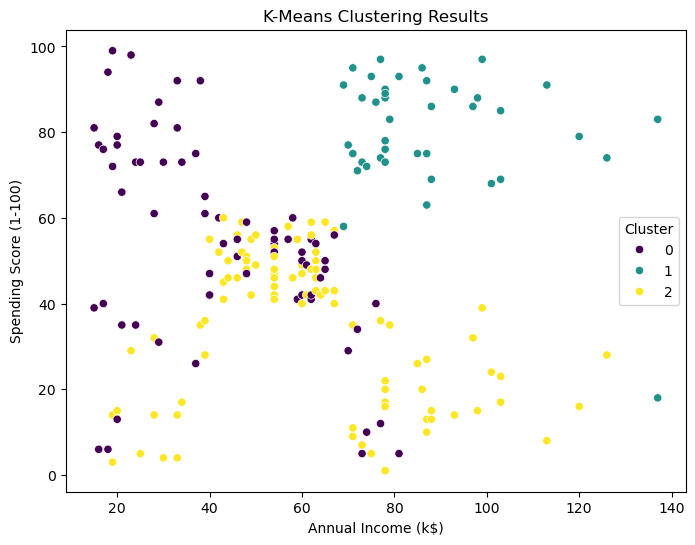

C:\Users\Dharani Ravi\AppData\Local\Temp\ipykernel_30048\512846810.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = df['Cluster']
C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.4823 - loss: 7.7041 - val_accuracy: 0.5500 - val_loss: 3.6990
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4050 - loss: 4.0803 - val_accuracy: 0.5500 - val_loss: 2.9061
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5665 - loss: 2.6705 - val_accuracy: 0.5750 - val_loss: 2.6432
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4620 - loss: 2.2487 - val_accuracy: 0.5500 - val_loss: 2.3608
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4810 - loss: 2.3446 - val_accuracy: 0.5500 - val_loss: 2.1481
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4689 - loss: 1.7353 - val_accuracy: 0.5500 - val_loss: 1.9608
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5447 - loss: 1.7602 - val_accuracy: 0.5500 - val_loss: 1.7631
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4700 - loss: 1.8209 - val_accuracy: 0.5250 - v

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

file_path = "C:\\Users\\Dharani Ravi\\Downloads\\kmeans\\Mall_Customers.csv"
df = pd.read_csv(file_path)

df['Genre'] = LabelEncoder().fit_transform(df['Genre'])  # Male = 1, Female = 0

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clustering Results")
plt.show()

X['Cluster'] = df['Cluster']
y = df['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.2f}")

print("\nComparison of K-Means and Neural Network:")
print(f"Clusters Identified: {df['Cluster'].nunique()}")
print(f"Neural Network Accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training vs Validation Accuracy')
plt.legend()
plt.show()
